# An example of PLplot

In [1]:
#thread
#require "plplot,jupyter.notebook"

In [2]:
let random_walk n =
  let rec walk acc p i =
    if i = 0 then List.rev acc else begin
      let q = if Random.bool () then succ p else pred p in
      walk (q :: acc) q (pred i)
    end in
  List.map float (walk [] 0 n)

val random_walk : int -> float list = <fun>


Generate a random walk process and plot it into file `/tmp/random_walk.png`.

In [3]:
let n = 1000 in
Plplot.Quick_plot.lines
  ~filename:"/tmp/random_walk.png"
  ~size:(560, 260)
  ~device:(`png `cairo)
  [
    Array.init n float,
    Array.of_list (random_walk n)
  ]

- : unit = ()


Display `/tmp/random_walk.png` on this notebook.

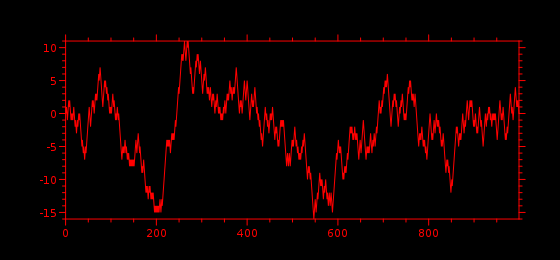

- : unit = ()


In [4]:
let ic = open_in_bin "/tmp/random_walk.png" in
let n = in_channel_length ic in
let data = really_input_string ic n in
close_in ic ;
JupyterNotebook.display ~base64:true "image/png" data